In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [46]:
data_dir = 'dataset'

In [47]:
classes = ['cat', 'cow', 'dog', 'lamb', 'zebra']

In [48]:
X , y = [], []

In [49]:
def extract_hog_features(img_path):
  img =cv2.imread(img_path)
  if img is None:
    print(f"Error loading image: {img_path}")
    return None
  img = cv2.resize(img, (128, 128))
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  features = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
  return features

In [50]:
for label, cls in enumerate(classes):
  cls_dir = os.path.join(data_dir, cls)
  if not os.path.isdir(cls_dir):
    continue
  for file in os.listdir(cls_dir):
    path = os.path.join(cls_dir, file)
    features = extract_hog_features(path)
    if features is not None:
      X.append(features)
      y.append(label)

In [51]:
X = np.array(X)
y= np.array(y)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [53]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [54]:
y_pred = model.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred, target_names=classes))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         cat       0.61      0.50      0.55        22
         cow       0.33      0.25      0.29        20
         dog       0.58      0.67      0.62        21
        lamb       0.50      0.73      0.59        22
       zebra       0.67      0.55      0.60        22

    accuracy                           0.54       107
   macro avg       0.54      0.54      0.53       107
weighted avg       0.54      0.54      0.53       107

Accuracy: 0.5420560747663551


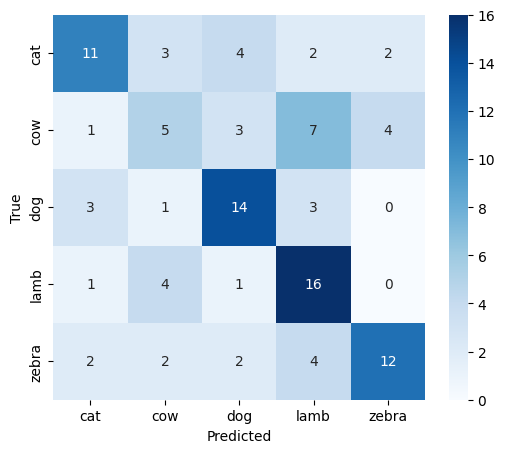

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()